# Decision tree, random forest

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

# from code_py.sklearn_1 import Xtrain

X, y = make_blobs(n_samples=300,
                  centers=4,
                  random_state=0,
                  cluster_std=1)
X[0:5]

array([[ 0.02458305,  2.96215652],
       [-1.52392631,  7.12573205],
       [ 1.27450825,  5.63017322],
       [-0.86552334,  7.80121774],
       [ 0.74874067,  2.55579434]])

In [6]:
y[0:5]

array([1, 3, 0, 3, 1])

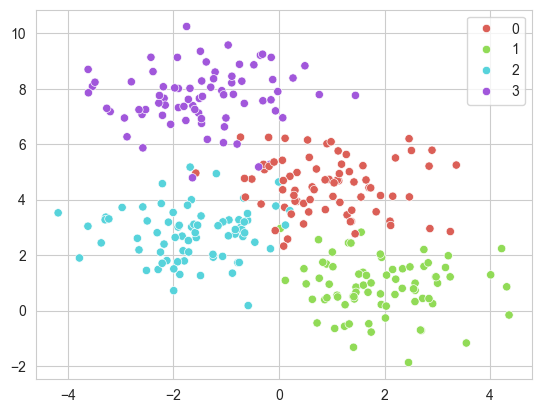

In [8]:
# plot the two dimensions of X; color with the class in y
sns.scatterplot(x = X[:,0], y = X[:,1], hue=y, palette=sns.color_palette("hls", 4));

## Decision tree

In [13]:
# split the data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3,random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(Xtrain, ytrain)

In [10]:
# tree

DecisionTreeClassifier()

In [15]:
ytest_pred = tree.predict(Xtest)

In [16]:
np.sum(ytest == ytest_pred)

np.int64(81)

In [18]:
ytest.shape

(90,)

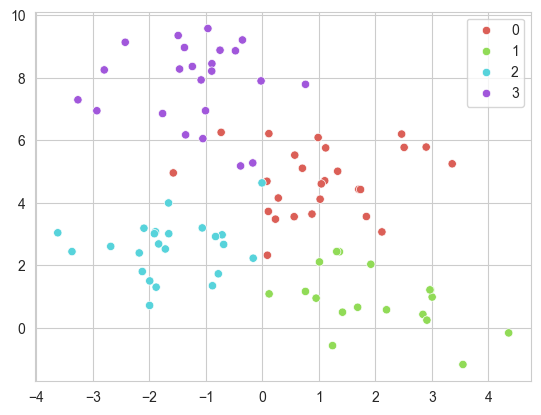

In [19]:
sns.scatterplot(x = Xtest[:,0], y = Xtest[:,1], hue=ytest, palette=sns.color_palette("hls", 4));

In [28]:
Xtest[0:3]

array([[-1.99374956,  1.50097615],
       [ 1.84070628,  3.56162231],
       [-0.17005847,  5.27627535]])

In [29]:
# tt = pd.DataFrame(Xtest, columns=['x1', 'x2'])
# tt['new'] = ytest
content = np.column_stack((Xtest, ytest, ytest_pred))
test_df = pd.DataFrame(content, columns=['x1', 'x2', 'y', 'pred'])
test_df.head()

,x1,x2,y,pred
0,-1.993750,1.500976,2.0,2.0
1,1.840706,3.561622,0.0,0.0
2,-0.170058,5.276275,3.0,0.0
3,-0.352996,9.210424,3.0,3.0
4,0.118988,1.086442,1.0,1.0


In [31]:
# add a new column where y and pred do not match
test_df['mismatch'] = np.where(test_df['y'] != test_df['pred'], 1, 0)
test_df

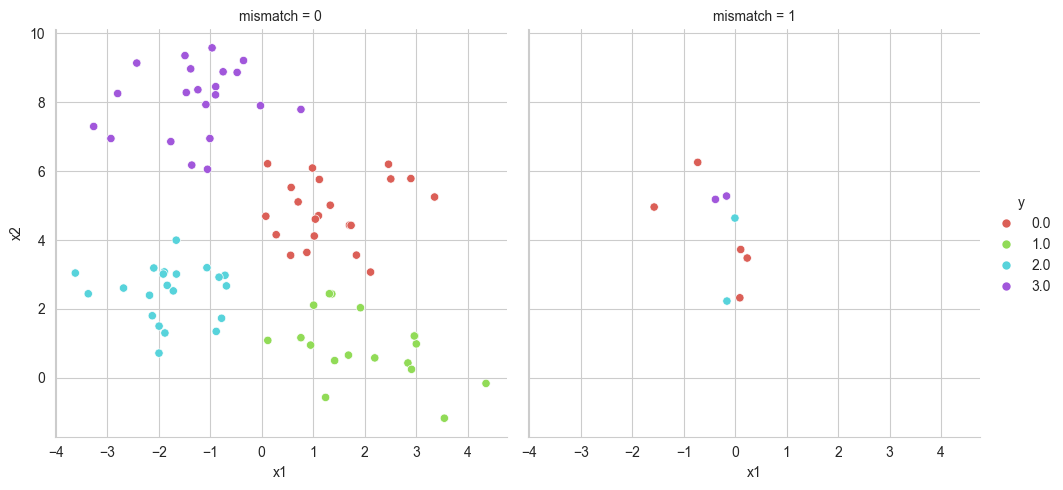

In [37]:
# try to visualize based on mismatch status
sns.relplot(data = test_df,
            x = 'x1',
            y = 'x2',
            col = 'mismatch',
            hue = 'y',
            palette=sns.color_palette("hls", 4));

<Axes: xlabel='x1', ylabel='x2'>

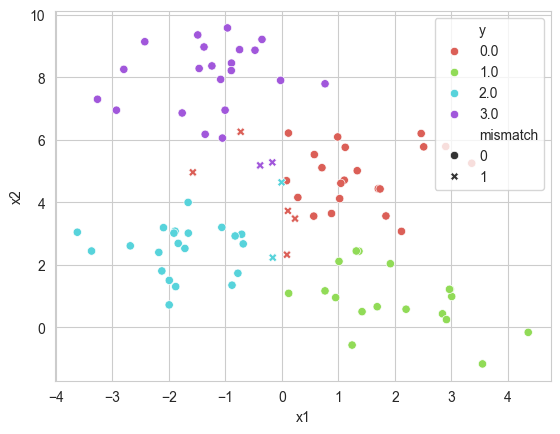

In [39]:
# plot the overlapping
sns.scatterplot(data = test_df,
                x = 'x1',
                y = 'x2',
                hue = 'y',
                style = 'mismatch',
                palette=sns.color_palette("hls", 4))

## Random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
# tree = DecisionTreeClassifier().fit(Xtrain, ytrain)
forest = RandomForestClassifier(max_depth=3, random_state=42)
forest.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=3, random_state=42)

In [41]:
# prediction rf
ytest_pred_rf = forest.predict(Xtest)

In [42]:
np.sum(ytest == ytest_pred_rf)/len(ytest)

np.float64(0.9333333333333333)

In [43]:
np.sum(ytest == ytest_pred)/len(ytest) # the previous one

np.float64(0.9)

### Probabilities

In [44]:
# try to produce the scores
# ROC curve is not feasible for more than two classes
tree_prob = tree.predict_proba(Xtest)

In [45]:
tree_prob # either 0 or 1, for each of the four classes

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],


In [46]:
# what about rf
rf_prob = forest.predict_proba(Xtest)

In [47]:
rf_prob

array([[7.59752641e-03, 1.04244402e-01, 7.91024136e-01, 9.71339356e-02],
       [6.83767920e-01, 2.08241529e-01, 9.45605632e-02, 1.34299883e-02],
       [7.48713429e-01, 3.74559929e-02, 1.19036429e-01, 9.47941486e-02],
       [1.20206446e-01, 4.00162856e-03, 3.39579455e-02, 8.41833980e-01],
       [2.39855986e-01, 5.20042544e-01, 2.03875648e-01, 3.62258219e-02],
       [3.54160878e-01, 3.19376458e-01, 2.78382043e-01, 4.80806204e-02],
       [3.53639799e-02, 1.14555486e-02, 8.40741051e-01, 1.12439421e-01],
       [7.83404577e-01, 1.55174309e-01, 1.42839976e-02, 4.71371167e-02],
       [6.66198099e-02, 9.26692278e-01, 6.68791177e-03, 0.00000000e+00],
       [2.03146853e-03, 0.00000000e+00, 9.19041508e-02, 9.06064381e-01],
       [3.74120926e-02, 1.14555486e-02, 8.68163150e-01, 8.29692083e-02],
       [8.50661732e-03, 1.39827174e-01, 7.83235662e-01, 6.84305464e-02],
       [6.66198099e-02, 9.26692278e-01, 6.68791177e-03, 0.00000000e+00],
       [4.12634635e-02, 1.50370782e-02, 8.85247442e

In [48]:
# do they sum up to 1? (row-wise)
rf_prob.sum(axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])